# Test for model testing

## Experiment 4
Location test without stratification



In [1]:
import random
import pathlib
import itertools
import collections
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load in the imputed dataset

In [2]:
X = []
Y = []
title = []
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
for i, data in enumerate(dirData):
    if i % 2:
        continue
    coorLoad = np.loadtxt(coorDataLocation + data)
    coorShape= np.loadtxt(coorDataLocation + dirData[i + 1])
    try:
        coorLoad = coorLoad.reshape(coorLoad.shape[0], coorLoad.shape[1] // int(coorShape[2]), int(coorShape[2]))
    except:
        print(data, dirData[i + 1], coorLoad.shape, coorShape.shape)
    title.append(data)
    X.append(coorLoad)
len(X)

14058

#### Remove the .npy and replace .mp4

In [11]:
newTitle = []

for name in title:
    newName = name[:-4] + '.mp4'
    newTitle.append(newName)
title = np.array(newTitle)
len(title)

14058

#### Save OriginalX values

In [12]:
originalX = X
originalTitle = title
len(originalX)

14058

#### In case error ocured reload in x

In [13]:
X = originalX
title = originalTitle
len(X)

14058

# Load in the classifications

In [14]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
Locations = {}
for word in os.listdir(saveLocation):
    Locations[word] = None
    
f = open("keyBindsLocation.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            Locations[line.split("_|_")[0]] = None
        else:
            Locations[line.split("_|_")[0]] = line.split("_|_")[1]
    except:
        i = 1
    line = f.readline()
f.close()
Locations

{'ABOUT1': 'Hand\n',
 'ABOUT2': None,
 'ABOUT2(7)': 'Neutral\n',
 'ABOUT2(B)': None,
 'ABOUT2(FALSE-START)': None,
 'ACCEPT': 'Chest\n',
 'ACCOMMODATION-2H': 'Neutral\n',
 'ACCURATE': 'Hand\n',
 'ACHIEVE': None,
 'ACTIVITY-THERE': 'Neutral\n',
 'ADULT': None,
 'AFRAID': None,
 'AFTERNOON': None,
 'AFTERNOON3': None,
 'AFTERNOON4': 'Chin\n',
 'AGAIN': None,
 'AGAIN(8)': None,
 'AGAIN-2H': None,
 'AGAIN-AND-AGAIN': 'Neutral\n',
 'AGES': 'Wrist\n',
 'AGREE': 'Hand\n',
 'AIM': 'Hand\n',
 'ALIVE': None,
 'ALL': None,
 'ALL-2H': None,
 'ALL-DAY': 'Neutral\n',
 'ALL-DAY-2H': 'Neutral\n',
 'ALL-DAY-LONG': 'Neutral\n',
 'ALLOW': None,
 'ALMOST': None,
 'ALMOST(FLATGO)': None,
 'ALMOST-2H': None,
 'ALRIGHT': 'Ear\n',
 'ALRIGHT-2H': None,
 'ALRIGHT2': 'Neutral\n',
 'ALWAYS': 'Ear\n',
 'ALWAYS1': None,
 'ALWAYS2': None,
 'AMERINDIAN': 'Head\n',
 'AMERINDIAN(FALSE START)': None,
 'AMERINDIAN2': 'Mouth\n',
 'AMERINDIAN2(FALSE START)': None,
 'AND-THEN': None,
 'AND1': 'Neutral\n',
 'ANGRY': None,
 '

# See what percentage of words have a Classification

In [15]:
print(len(Locations.items()))
print(len([i for i in Locations.values() if not i == None]))


1972
697


## Load in usability

In [16]:
usability = {}

f = open("useability.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            usability[line.split("_|_")[0]] = None
        else:
            usability[line.split("_|_")[0]] = int(line.split("_|_")[1])
    except:
        if line != '\n':
            print(line)
    line = f.readline()
f.close()
usability

{'ABOUT1_BFSA1c2a_1630_1990.mp4': 0,
 'ABOUT1_BRCA1c2a_27365_27645.mp4': 0,
 'ABOUT1_BRCA1c2a_29505_29985.mp4': 0,
 'ABOUT1_SBS1A3c7a_950_1280.mp4': 3,
 'ABOUT2_AAPB2c7a_310_800.mp4': 2,
 'ABOUT2_AJPB1c2b_2490_2650.mp4': 0,
 'ABOUT2_AJPB2c7a_1135_2270.mp4': 3,
 'ABOUT2_AMGA1c2a_1580_1820.mp4': 1,
 'ABOUT2_AMGA1c2a_730_1170.mp4': 3,
 'ABOUT2_AMW2A1c2b_890_1020.mp4': 1,
 'ABOUT2_BCHA2c7a_4470_5330.mp4': 0,
 'ABOUT2_BCHA2c7a_5750_6050.mp4': 0,
 'ABOUT2_BDLA1c2a_1800_2290.mp4': 0,
 'ABOUT2_BMKB2c7a_1010_1700.mp4': 4,
 'ABOUT2_BRCA1c2a_9460_9980.mp4': 0,
 'ABOUT2_MBHA1c2a_4750_5175.mp4': 4,
 'ABOUT2_MFKA1c2a_6180_6460.mp4': 2,
 'ABOUT2_MGCA1c2b_4880_5510.mp4': 4,
 'ABOUT2_MGCA1c2b_52725_53635.mp4': 4,
 'ABOUT2_MGCA1c2b_5840_6150.mp4': 2,
 'ABOUT2_MTDBA2c7a_1290_2190.mp4': 4,
 'ABOUT2_PGMB1c2a_1230_2110.mp4': 4,
 'ABOUT2_PJEB1c2a_2500_3100.mp4': 4,
 'ABOUT2_PNAA1c2b_1880_2660.mp4': 4,
 'ABOUT2_SBS1A1c2b_7320_7630.mp4': 2,
 'ABOUT2_SPKA1c2a_171110_171409.mp4': 1,
 'ABOUT2_STMB1c2a_13650_13800

## Primary Movement KeyBind.txt -> int

In [17]:
label_keys = {"Head\n":0, "Eye\n":1, "Forehead\n":2, "Nose\n":3, 
              "Ear\n":4, "Mouth\n":5, "Chin\n":6, 
              "Neck\n":7, "Shoulders\n":8, 
              "ArmPit\n":9, "Chest\n":10, "Waist\n": 11,
              "Back\n":9, "Thigh\n":10, "Stomach\n": 11,
              "Arm\n":9, "Wrist\n":10, "Hand\n": 11,
              "Neutral\n": 11}
label_keys

{'Head\n': 0,
 'Eye\n': 1,
 'Forehead\n': 2,
 'Nose\n': 3,
 'Ear\n': 4,
 'Mouth\n': 5,
 'Chin\n': 6,
 'Neck\n': 7,
 'Shoulders\n': 8,
 'ArmPit\n': 9,
 'Chest\n': 10,
 'Waist\n': 11,
 'Back\n': 9,
 'Thigh\n': 10,
 'Stomach\n': 11,
 'Arm\n': 9,
 'Wrist\n': 10,
 'Hand\n': 11,
 'Neutral\n': 11}

# Assign each data point to a classification
## Each of these will be classified to X and Y

In [18]:
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
videoWord = []
for i, data in enumerate(dirData):
    if i % 2:
        continue
    try:
        videoWord.append(label_keys[Locations[data.split("_")[0]]])
    except:
        videoWord.append(99) 
videoWord

[11,
 11,
 11,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 10,
 11,
 11,
 11,
 11,
 99,
 99,
 99,
 11,
 99,
 99,
 99,
 99,
 6,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 11,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 99,
 99,
 99,
 99,
 11,
 11,
 11,
 11,
 11,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 11,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 

## Append X values with a Y data label

In [19]:
newX = []
newTitle = []
Y = []
print(len(X), len(videoWord))
for i, y in enumerate(videoWord):
    # 99 was assigned if an error occured when importing and 11 is for unknown datalabels
    if y != 99 and y != 11:
        newX.append(X[i])
        newTitle.append(title[i])
        Y.append(y)
X = newX
title = np.array(newTitle)
print(len(X), len(title))

14058 14058
1580 1580


## Remove X and Y that are low usability

In [20]:
print(len(X),len(Y))
newX = []
newY = []
for i in range(len(X)):
    if usability[title[i]] >= 3:
        newX.append(X[i])
        newY.append(Y[i])
X = np.array(newX)
Y = np.array(newY)
print(len(X),len(Y))

1580 1580
857 857


## check shape of data

In [21]:
newX = []
newY = []
for i in range(len(X)):
    try:
        if X[i].shape[1] == 33 or X[i].shape[2] == 3:
            newX.append(X[i])
            newY.append(Y[i])
    except:
        continue
X = np.array(newX)
Y = np.array(newY)

In [22]:
print(len(X), len(Y), len(originalX))
print(X.shape)

857 857 14058
(857, 40, 33, 3)


# Reshape insto 1d shape

In [23]:
newX = []
for i in range(len(X)):
    newInfo = []
    for frame in X[i]:
        for joint in frame:
            for coor in joint:
                newInfo.append(coor)
    newX.append(newInfo)
X = np.array(newX)
print(X.shape)

(857, 3960)


## Create Training Splits

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Print amounts of percentage of each Y value in training set
vCount = pd.DataFrame(y_train)
print(vCount.value_counts() / len(X))

4     0.168028
5     0.136523
6     0.121354
10    0.113186
0     0.046674
2     0.022170
9     0.021004
3     0.016336
1     0.010502
8     0.008168
7     0.005834
dtype: float64


## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
bottom = 3
top = 30
step = 7
predictClass = []
kNeighborsPredictions = []
for i in range(bottom, top,step):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    kNeighborsPredictions.append(clf)
for neigh in kNeighborsPredictions:
    print(neigh)
    # Error calculation
    print("training acuracy: ", neigh.score(X_train, y_train))
    print("validation acuracy: ", neigh.score(X_test, y_test))
    print("training error: ", 1 - neigh.score(X_train, y_train))
    print("validation error: ", 1- neigh.score(X_test, y_test))
    print("\n")



KNeighborsClassifier(n_neighbors=3)
training acuracy:  0.6254355400696864
validation acuracy:  0.26501766784452296
training error:  0.3745644599303136
validation error:  0.734982332155477


KNeighborsClassifier(n_neighbors=10)
training acuracy:  0.45121951219512196
validation acuracy:  0.303886925795053
training error:  0.5487804878048781
validation error:  0.6961130742049471


KNeighborsClassifier(n_neighbors=17)
training acuracy:  0.40418118466898956
validation acuracy:  0.254416961130742
training error:  0.5958188153310104
validation error:  0.7455830388692579


KNeighborsClassifier(n_neighbors=24)
training acuracy:  0.38153310104529614
validation acuracy:  0.2756183745583039
training error:  0.6184668989547039
validation error:  0.7243816254416962




C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


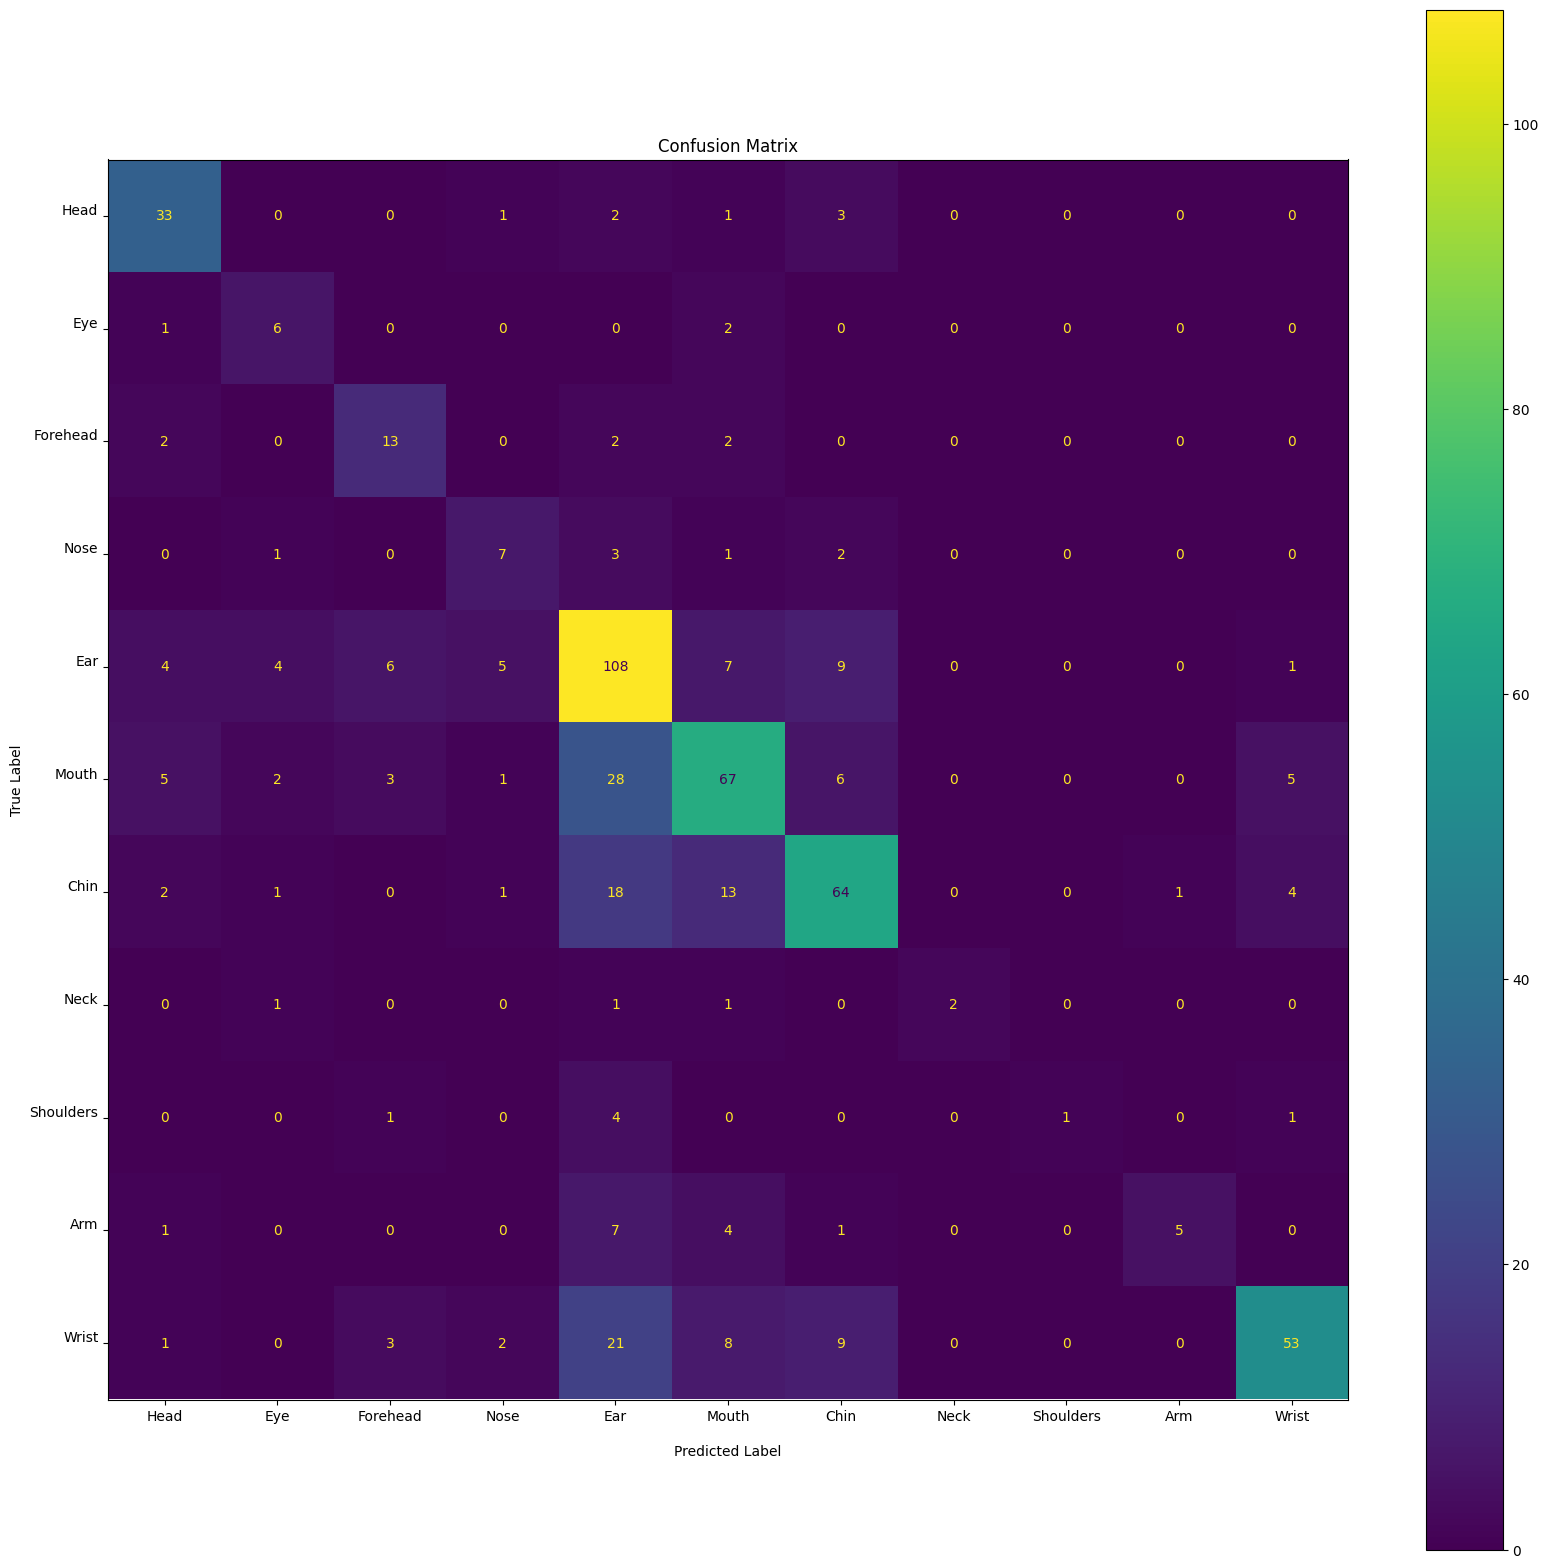

In [26]:
from sklearn import metrics
clf = kNeighborsPredictions[0]
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

color = 'white'
fig, ax = plt.subplots(figsize=(20, 20))
matrix = metrics.plot_confusion_matrix(clf, X_train, y_train, ax=ax)
matrix.ax_.set_title('Confusion Matrix', color='Black')
plt.xlabel('Predicted Label', color='Black')
plt.ylabel('True Label', color='Black')
matrix.ax_.xaxis.set_ticklabels(label)
matrix.ax_.yaxis.set_ticklabels(label)
# plt.gcf().axes[0].tick_params(colors='Black')
# plt.gcf().axes[1].tick_params(colors='Black')
plt.show()

## DecisionTreeClassifier
A decision tree classifier.

In [27]:
from sklearn.tree import DecisionTreeClassifier
deTree = DecisionTreeClassifier()
deTree.fit(X_train, y_train)

print("training acuracy: ", deTree.score(X_train, y_train))
print("validation acuracy: ", deTree.score(X_test, y_test))
print("training error: ", 1 - deTree.score(X_train, y_train))
print("validation error: ", 1- deTree.score(X_test, y_test))


training acuracy:  1.0
validation acuracy:  0.3250883392226148
training error:  0.0
validation error:  0.6749116607773852


## RandomForestClassifier
A random forest classifier.

In [28]:
from sklearn.ensemble import RandomForestClassifier
deTree = RandomForestClassifier()
deTree.fit(X_train, y_train)

print("training acuracy: ", deTree.score(X_train, y_train))
print("validation acuracy: ", deTree.score(X_test, y_test))
print("training error: ", 1 - deTree.score(X_train, y_train))
print("validation error: ", 1- deTree.score(X_test, y_test))

training acuracy:  1.0
validation acuracy:  0.49469964664310956
training error:  0.0
validation error:  0.5053003533568905


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


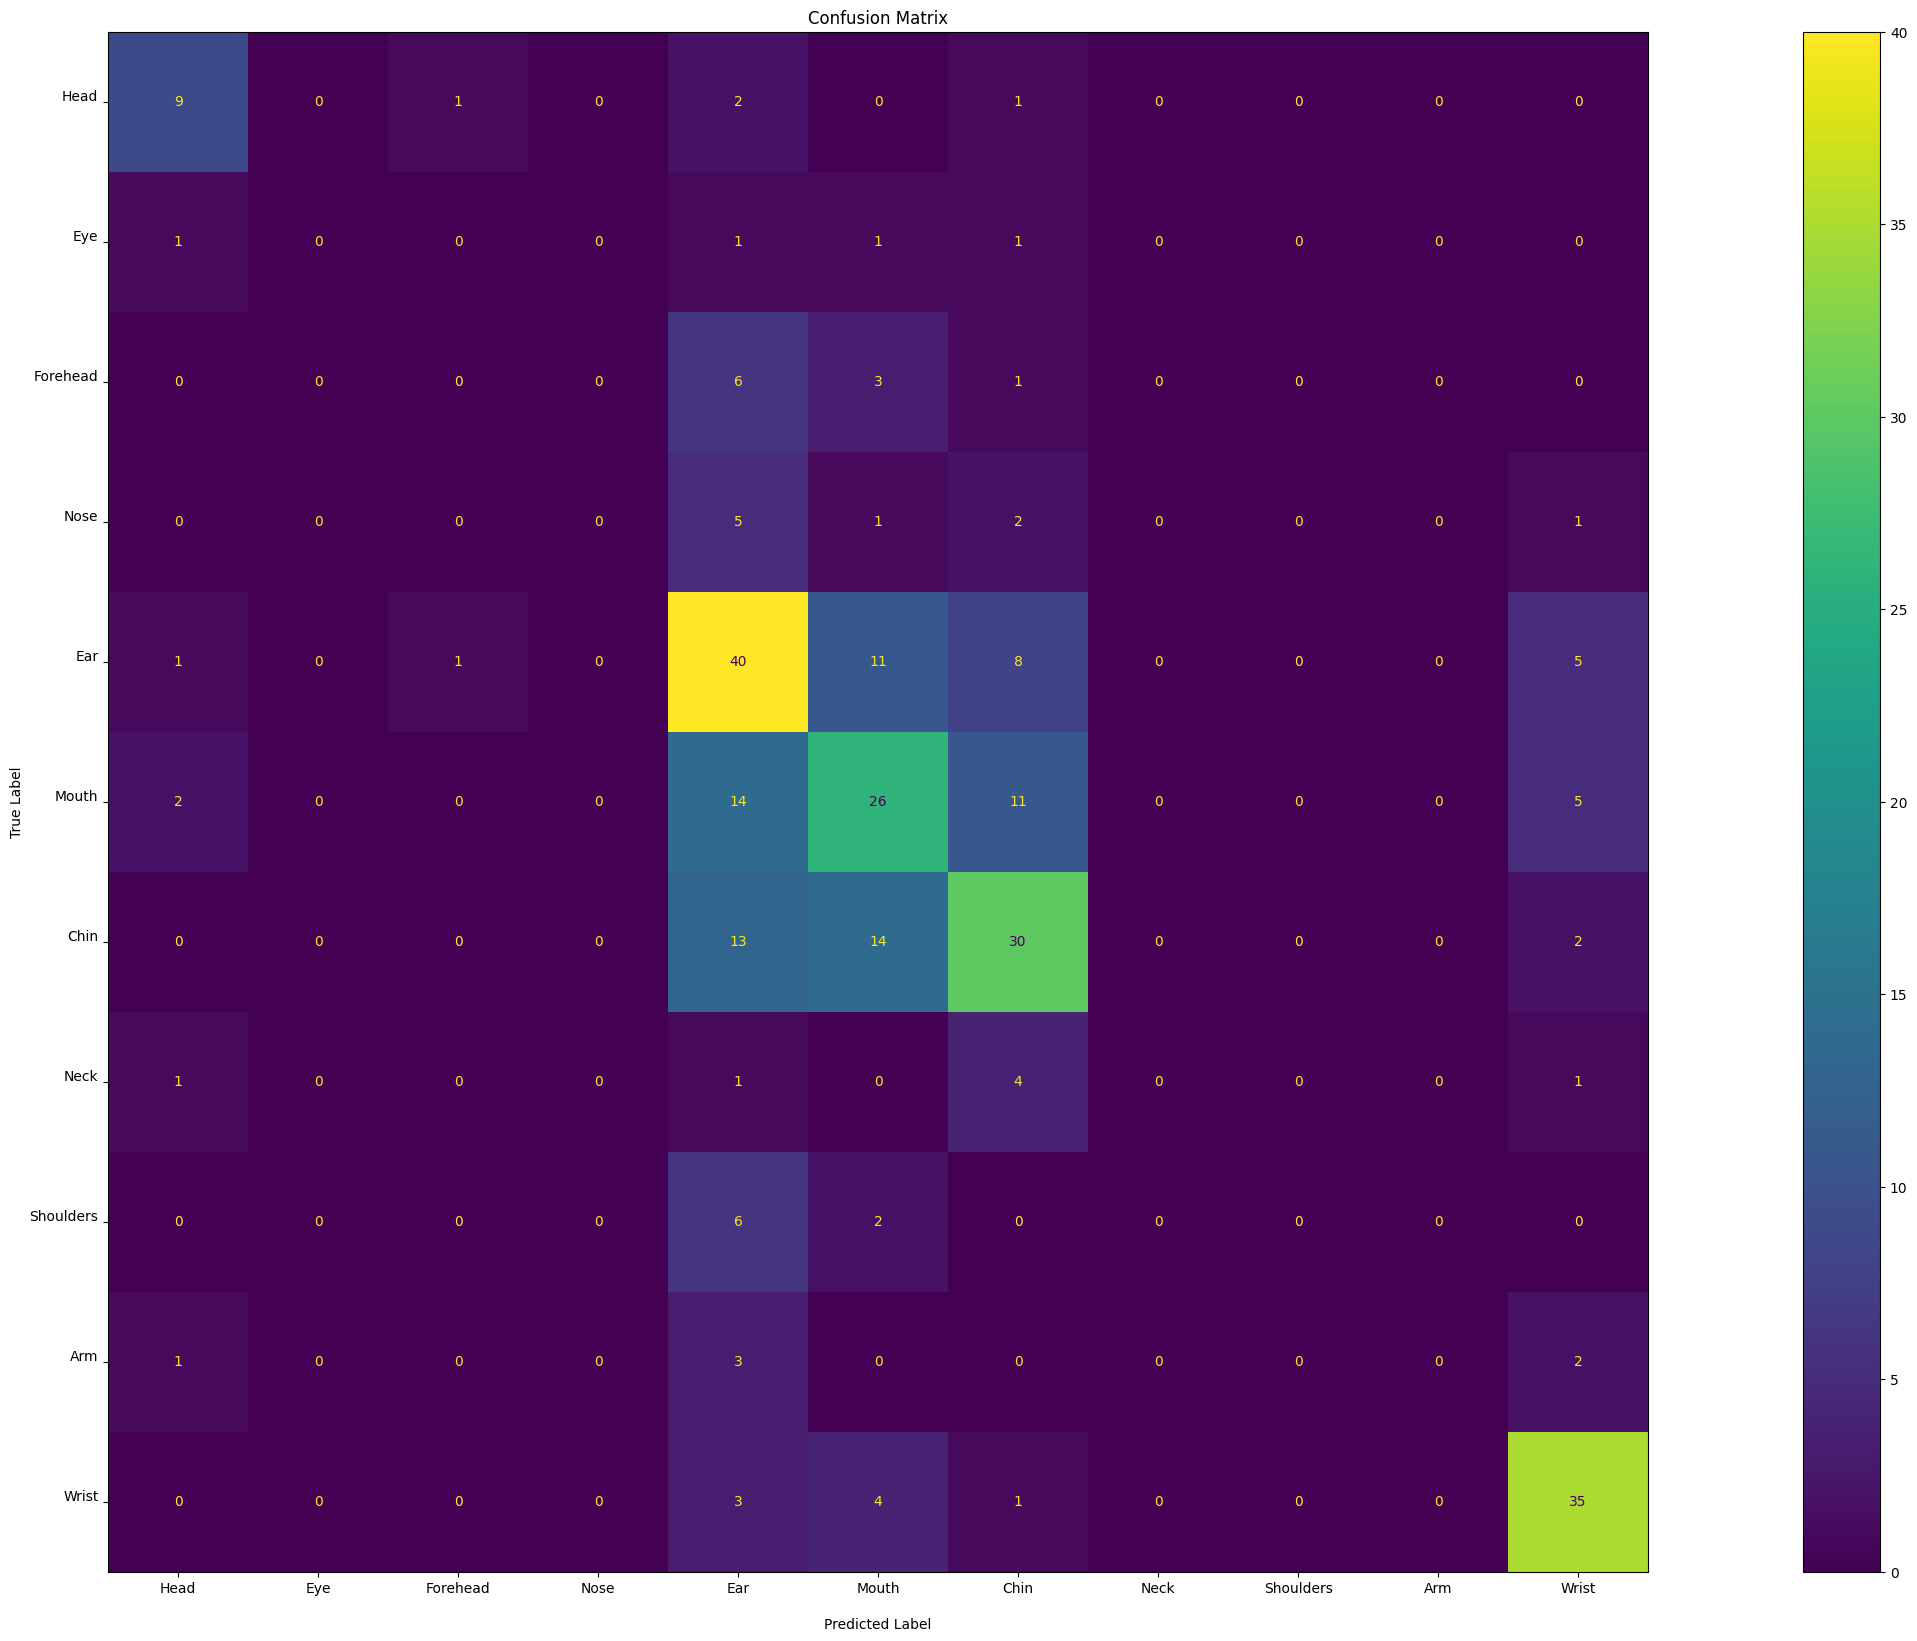

In [29]:
from sklearn import metrics
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

color = 'white'
fig, ax = plt.subplots(figsize=(40, 20))
matrix = metrics.plot_confusion_matrix(deTree, X_test, y_test, ax=ax)
ax.set_title('Confusion Matrix', color='Black')
plt.xlabel('Predicted Label', color='Black')
plt.ylabel('True Label', color='Black')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
# plt.gcf().axes[0].tick_params(colors='Black')
# plt.gcf().axes[1].tick_params(colors='Black')
plt.savefig("C:/Users/KAI/OneDrive/Documents/2023 Sem 2/REIT4841/Data/ConfusionMatrixRFC.png")
plt.show()

## MLP NeuralNetwork
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

In [30]:
from sklearn.neural_network import MLPClassifier
deTree = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(6000,11), max_iter=3000, )
deTree.fit(X_train, y_train)

print("training acuracy: ", deTree.score(X_train, y_train))
print("validation acuracy: ", deTree.score(X_test, y_test))
print("training error: ", 1 - deTree.score(X_train, y_train))
print("validation error: ", 1- deTree.score(X_test, y_test))

KeyboardInterrupt: 

CNN Torch